# Windowing of an audio signal

Tutorial to illustrate the concept of an spectrogram in the context of automatic speech recognition.

This tutorial relies on a piece of [code by Frank Zalkow](http://www.frank-zalkow.de/en/code-snippets/create-audio-spectrograms-with-python.html?i=1). 

In [1]:
import numpy as np
import scipy.io.wavfile as wav
import time
from matplotlib import pyplot as plt
import matplotlib as mpl
%matplotlib notebook

First, let us load a wav audio file using the wav.read function

The original digital audio signal consists of 14336 samples, sampled at a rate of 16000 samples/sec.
Check that the recording lasts about 0.896 seconds.


Text(0,0.5,'amplitude')

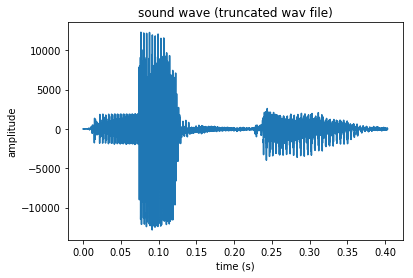

In [2]:
sample_rate, samples = wav.read('happy.wav')

n_samples = len(samples)
print('The original digital audio signal consists of',n_samples, 
      'samples, sampled at a rate of',sample_rate,'samples/sec.')

length = n_samples/sample_rate
print('Check that the recording lasts about',length,'seconds.')

########### OPTIONAL ####################
# ADAPT THIS TO YOUR OWN RECORDING
start_ind = int(round(.5*n_samples))
end_ind = int(round(.95*n_samples))
samples = samples[start_ind:end_ind]
n_samples = len(samples)
length = n_samples/sample_rate
#########################################

t = np.linspace(0,length,n_samples)
plt.subplots()
signal_plot = plt.plot(t,samples)
plt.title('sound wave (truncated wav file)')
plt.xlabel('time (s)')
plt.ylabel('amplitude')

As far as I understand, the units of the amplitude depend on the original recording.

You can choose different types of windows. Common windows include Hanning, Hamming, Kaiser, Bartlett, Blackman or no window.

Functions used:

[strides](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.ndarray.strides.html)

[window functions](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.window.html)

[as_strided](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.lib.stride_tricks.as_strided.html)

In [3]:
frame_size = 2**11
overlap = 0.5
dt = t[1]

if frame_size > len(samples):
    print('Be careful, your frame size is larger than your sample size')

############################################################
window = np.hanning(frame_size)
stride_length = int(frame_size - np.floor(overlap*frame_size))

# append zeros at beginning of the domain 
# so that the crest of the 1st window coindices with the first sample
samples_left_pad = np.append(np.zeros(int(np.floor(frame_size/2.0)) ), samples)   

t_left_pad = np.append(np.linspace(-int(np.floor(frame_size/2.0))*dt,
                                   -t[1],int(np.floor(frame_size/2.0))),t)

# number of windowing frames
n_frames = int(np.ceil((len(samples_left_pad) - frame_size) / float(stride_length))) + 1

# append zeros at the end of the domain in case the window oversteps the boundary
samples_pad = np.append(samples_left_pad, np.zeros(int(np.ceil(frame_size/2.0)) ))

t_pad = np.append(t_left_pad, 
                  np.linspace(t[-1],t[-1]+int(np.ceil(frame_size/2.0))*dt,
                              int(np.ceil(frame_size/2.0)) ))

frames = np.lib.stride_tricks.as_strided(samples_pad, 
                                         shape=(n_frames, frame_size), 
                                         strides=(samples_pad.strides[0]*stride_length, 
                                         samples_pad.strides[0])).copy()

t_frames = np.lib.stride_tricks.as_strided(t_pad, 
                                         shape=(n_frames, frame_size), 
                                         strides=(t_pad.strides[0]*stride_length, 
                                         t_pad.strides[0])).copy()

With the plotting script below, you can visualize the window slide over the signal. 
You can observe how windows overlap, and how the domain is expanded to left so that the crest of the window coindices with the first sample, and to the right to that none of the samples are left out.

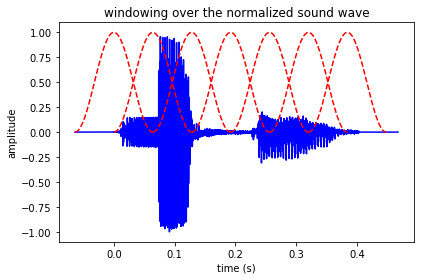

In [4]:
fig, ax = plt.subplots()
max_samples = np.max(abs(samples_pad))


signal_plot = plt.plot(t_pad,samples_pad/max_samples,color = 'b')
plt.title('windowing over the normalized sound wave')

for i in range(n_frames):  

    window_plot = plt.plot(t_frames[i,:],window,'--',color='r')    
    fig.canvas.draw()
    plt.tight_layout()
    time.sleep(10/n_frames**2)    
    plt.xlabel('time (s)')
    plt.ylabel('amplitude')